In [2]:
#import all dependencies needed
import pandas as pd
from path import Path
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

In [3]:
#point to the csv file 
file = Path('./Resources/crypto_data.csv')
crypto_df = pd.read_csv(file, index_col=0)
crypto_df.head(10)

,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [4]:
#figure out what data types are in use
crypto_df.dtypes


CoinName            object
Algorithm           object
IsTrading             bool
ProofType           object
TotalCoinsMined    float64
TotalCoinSupply     object
dtype: object

In [7]:
#print a list of all the algorithms in use
algorithms = set(crypto_df.Algorithm.values)
print(algorithms)

{'Equihash', 'Scrypt', 'SHA-256', 'Slatechain', 'ScryptOG', 'M7 POW', 'NeoScrypt', 'Semux BFT consensus', 'X11', 'PHI1612', 'IMesh', 'Lyra2REv2', 'Green Protocol', 'CryptoNight-Lite', 'TRC10', 'PHI2', 'Equihash1927', '1GB AES Pattern Search', 'Dagger-Hashimoto', 'Avesta hash', 'Wild Keccak', 'M00N', 'YescryptR16', 'XG Hash', 'Shabal256', 'X14', 'Tribus', 'Jump Consistent Hash', 'Multiple', 'CryptoNight', 'X15', 'X16R', 'Cryptonight-GPU', 'Blake', 'X16S', 'SkunkHash v2 Raptor', 'SHA-256D', '536', 'Counterparty', 'SHA3', 'VeChainThor Authority', 'Lyra2Z', 'BLAKE256', 'Proof-of-BibleHash', 'QUAIT', 'Exosis', 'SkunkHash', 'VBFT', 'QuBit', 'XEVAN', 'Blake2b', 'Argon2', 'ECC 256K1', 'vDPOS', 'Blake2S', 'SHA3-256', 'Stanford Folding', 'Momentum', 'HybridScryptHash256', 'Skein', 'Ouroboros', 'SHA-512', 'Keccak', 'Rainforest', 'Leased POS', 'SHA-256 + Hive', 'QuarkTX', 'X13', 'Equihash+Scrypt', 'CryptoNight Heavy X', 'C11', 'Dagger', 'POS 2.0', 'Cloverhash', 'POS 3.0', 'X11GOST', 'Ethash', 'Cur

In [8]:
#Keep all the cryptocurrencies that are being traded.
crypto_df = crypto_df[crypto_df["IsTrading"] == True]
print(crypto_df.shape)
crypto_df.head(10)

(1144, 6)


,CoinName,Algorithm,IsTrading,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,True,PoW/PoS,4.199995e+01,42
365,365Coin,X11,True,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,True,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,True,PoW,NaN,611000
808,808,SHA-256,True,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,True,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,True,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,True,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,True,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,True,PoW,6.303924e+07,84000000


In [9]:
#Drop the "IsTrading" column since we just kept the active trades. 
crypto_df.drop(labels="IsTrading", axis=1, inplace=True)
print(crypto_df.shape)
crypto_df.head(10)

(1144, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
365,365Coin,X11,PoW/PoS,NaN,2300000000
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
611,SixEleven,SHA-256,PoW,NaN,611000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
2015,2015 coin,X11,PoW/PoS,NaN,0
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000


In [10]:
#Drop all rows that have null value(s).
crypto_df.dropna(inplace=True)
print(crypto_df.shape)
crypto_df.head(10)

(685, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
808,808,SHA-256,PoW/PoS,0.000000e+00,0
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000


In [11]:
#Keep all rows where coins have been mined (so find positive TotalCoinsMined values)
crypto_df = crypto_df[crypto_df["TotalCoinsMined"] > 0]
print(crypto_df.shape)
crypto_df.head(10)

(532, 5)


,CoinName,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,42 Coin,Scrypt,PoW/PoS,4.199995e+01,42
404,404Coin,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,EliteCoin,X13,PoW/PoS,2.927942e+10,314159265359
BTC,Bitcoin,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethereum,Ethash,PoW,1.076842e+08,0
LTC,Litecoin,Scrypt,PoW,6.303924e+07,84000000
DASH,Dash,X11,PoW/PoS,9.031294e+06,22000000
XMR,Monero,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethereum Classic,Ethash,PoW,1.133597e+08,210000000
ZEC,ZCash,Equihash,PoW,7.383056e+06,21000000


In [12]:
#Drop the column CoinName. We aren't going to use it for the clustering algorithm..
crypto_df.drop(labels="CoinName", axis=1, inplace=True)
print(crypto_df.shape)
crypto_df.head(10)

(532, 4)


,Algorithm,ProofType,TotalCoinsMined,TotalCoinSupply
42,Scrypt,PoW/PoS,4.199995e+01,42
404,Scrypt,PoW/PoS,1.055185e+09,532000000
1337,X13,PoW/PoS,2.927942e+10,314159265359
BTC,SHA-256,PoW,1.792718e+07,21000000
ETH,Ethash,PoW,1.076842e+08,0
LTC,Scrypt,PoW,6.303924e+07,84000000
DASH,X11,PoW/PoS,9.031294e+06,22000000
XMR,CryptoNight-V7,PoW,1.720114e+07,0
ETC,Ethash,PoW,1.133597e+08,210000000
ZEC,Equihash,PoW,7.383056e+06,21000000


In [14]:
#use get_dummies to create dummy variables for text/string values.
X = pd.get_dummies(data=crypto_df, columns=['Algorithm', 'ProofType'])
print(X.shape)
X.head(10)

(532, 98)


,TotalCoinsMined,TotalCoinSupply,Algorithm_1GB AES Pattern Search,Algorithm_536,Algorithm_Argon2d,Algorithm_BLAKE256,Algorithm_Blake,Algorithm_Blake2S,Algorithm_Blake2b,Algorithm_C11,...,ProofType_PoW/PoS,ProofType_PoW/PoS,ProofType_PoW/PoW,ProofType_PoW/nPoS,ProofType_Pos,ProofType_Proof of Authority,ProofType_Proof of Trust,ProofType_TPoS,ProofType_Zero-Knowledge Proof,ProofType_dPoW/PoW
42,4.199995e+01,42,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
404,1.055185e+09,532000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
1337,2.927942e+10,314159265359,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
BTC,1.792718e+07,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETH,1.076842e+08,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
LTC,6.303924e+07,84000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
DASH,9.031294e+06,22000000,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
XMR,1.720114e+07,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ETC,1.133597e+08,210000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
ZEC,7.383056e+06,21000000,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [15]:
#Standardize the data with StandardScaler.
X_scaled = StandardScaler().fit_transform(X)
X_scaled[0:5]

array([[-0.11710817, -0.1528703 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.07530656, -0.0433963 , -0.06142951, -0.06142951,
        -0.0433963 , -0.0433963 , -0.19245009, -0.06142951, -0.09740465,
        -0.0433963 , -0.11547005, -0.07530656, -0.0433963 , -0.0433963 ,
        -0.15191091, -0.0433963 , -0.13118084, -0.0433963 , -0.0433963 ,
        -0.08703883, -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.06142951, -0.0433963 , -0.08703883, -0.08703883, -0.08703883,
        -0.0433963 , -0.13118084, -0.13840913, -0.13840913, -0.0433963 ,
        -0.06142951, -0.0433963 , -0.07530656, -0.18168574, -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.07530656, -0.15826614, -0.31491833,
        -0.0433963 , -0.08703883, -0.07530656, -0.06142951,  1.38675049,
        -0.0433963 , -0.0433963 , -0.06142951, -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 , -0.0433963 ,
        -0.0433963 , -0.39879994, -0.0433963 , -0.1

In [16]:
#check the shape of the scaled data to understand the number of rows and columns
X_scaled.shape

(532, 98)

In [17]:
#now reduce dimensions with PCA. Pretty much cut and paste here from class code.
# Reduce dimensions with PCA
pca = PCA(n_components=.90)
principal_components = pca.fit_transform(X_scaled)
principal_components.shape

(532, 74)

In [18]:
#now we can use explained_variance to sum for the principal components
pca.explained_variance_.sum()

88.47283457566152

In [20]:
#and now we can reduce dimensions with t-SNE. Code from class.
tsne = TSNE(perplexity=50)
tsne_features = tsne.fit_transform(principal_components)
tsne_features.shape

(532, 2)

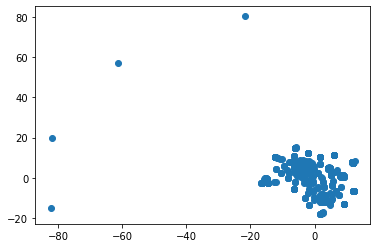

In [21]:
#on to plotting the T-SNE results from the run. Boiler plate code. Plot the results.
X = tsne_features[:,0]
y = tsne_features[:,1]

plt.scatter(X, y)
plt.show()

In [22]:
#identify the clusters using k-means in a for-loop
inertia = []
k = list(range(1,11))

for i in k:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(principal_components)
    inertia.append(kmeans.inertia_)

C:\Users\luxu\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=3.
  warnings.warn(


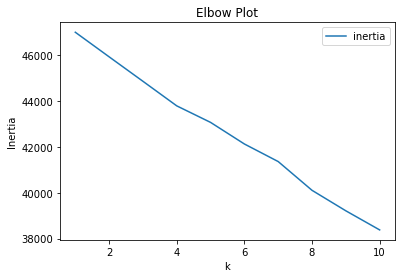

In [23]:
#run the elbow plot from the code in the notes
elbow_df = pd.DataFrame({'k': k, 'inertia': inertia})
elbow_df.plot.line(x='k', y='inertia')
plt.ylabel('Inertia')
plt.title('Elbow Plot')
plt.show()

In [24]:
print("Conclusions: Neither the TSNE run, nor the KMeans run suggest that meaningful clusters exist in the dataset that we analyzed. Unfortunately I did not discover a sure-fire get-rich-quick method of analyzing cryptocurrency data such that I could YOLO my savings and make a ton of money quickly and retire in style within the year. This is a depressing discovery. Back to work I go.")

Conclusions: Neither the TSNE run, nor the KMeans run suggest that meaningful clusters exist in the dataset that we analyzed. Unfortunately I did not discover a sure-fire get-rich-quick method of analyzing cryptocurrency data such that I could YOLO my savings and make a ton of money quickly and retire in style within the year. This is a depressing discovery. Back to work I go.
